In [1097]:
#Read in two csv files. The first, mlbSalaries.csv contains MLB salaries for every player during 
#the past few seasons. We will restrict this later to only 2019 salaries for building our regression model
#to predict player salary.
#mlb2019stats.csv contains the individual stats for every mlb player during the 2019 regular season

import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
mlb_salaries = pd.read_csv('/content/drive/MyDrive/Data_Science_Projects/mlbSalaries.csv')
stats = pd.read_csv('/content/drive/MyDrive/Data_Science_Projects/mlb2019stats.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1098]:
mlb_salaries.head()

,year,team,name,salary,playerID
0,2019,arizona-diamondbacks,Eduardo Escobar,6166666,500871
1,2019,arizona-diamondbacks,Robbie Ray,6050000,592662
2,2019,arizona-diamondbacks,Taijuan Walker,5025000,592836
3,2019,arizona-diamondbacks,Jake Lamb,4825000,571875
4,2019,arizona-diamondbacks,Adam Jones,4500000,430945


In [1099]:
stats.head()

,playerID,nameFirst,nameLast,bats,throws,age,year,stints,teamID,lg,...,g2,pos3,g3,pos4,g4,pos5,g5,mlbam_id,baseball_prospectus_id,n2019
0,abreujo02,Jose,Abreu,R,R,32,2019,1,CHA,AL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,547989.0,ABREU19870129A,392.0
1,acunaro01,Ronald,Acuna,R,R,21,2019,1,ATL,NL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,660670.0,ACUNA19971218A,1577.0
2,adamecr01,Cristhian,Adames,B,R,27,2019,1,SFN,NL,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,542436.0,ADAMES19910726A,NaN
3,adamewi01,Willy,Adames,R,R,23,2019,1,TBA,AL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,642715.0,ADAMES19950902A,489.0
4,adamsma01,Matt,Adams,L,R,30,2019,1,WAS,NL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,571431.0,ADAMS19880831A,1413.0


In [1100]:
#Drop insignificant columns from the stats dataframe
print(stats.columns)
dropped_cols = [0,6,7,9,34,36,37,38,39,40,41,42,43,44,45,46,47]
stats.drop(stats.columns[dropped_cols],axis=1,inplace=True)
print(stats.columns)

Index(['playerID', 'nameFirst', 'nameLast', 'bats', 'throws', 'age', 'year',
       'stints', 'teamID', 'lg', 'G', 'tap', 'AB', 'R', 'H', 'db', 'tr', 'HR',
       'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'hbp', 'SH', 'SF', 'GIDP', 'avg',
       'obp', 'slg', 'woba', 'PRO', 'GURU', 'ROTO', 'pos1', 'g1', 'pos2', 'g2',
       'pos3', 'g3', 'pos4', 'g4', 'pos5', 'g5', 'mlbam_id',
       ' baseball_prospectus_id ', 'n2019'],
      dtype='object')
Index(['nameFirst', 'nameLast', 'bats', 'throws', 'age', 'teamID', 'G', 'tap',
       'AB', 'R', 'H', 'db', 'tr', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB',
       'hbp', 'SH', 'SF', 'GIDP', 'avg', 'obp', 'slg', 'woba', 'PRO', 'GURU',
       'pos1'],
      dtype='object')


In [1101]:
stats.head()

,nameFirst,nameLast,bats,throws,age,teamID,G,tap,AB,R,...,SH,SF,GIDP,avg,obp,slg,woba,PRO,GURU,pos1
0,Jose,Abreu,R,R,32,CHA,159.0,693.0,634.0,85.0,...,0.0,10.0,24.0,0.283912,0.330447,0.503155,0.354834,245.90,79.642904,1B
1,Ronald,Acuna,R,R,21,ATL,156.0,712.0,626.0,127.0,...,0.0,1.0,8.0,0.279553,0.365169,0.517572,0.380365,270.82,104.352687,OF
2,Cristhian,Adames,B,R,27,SFN,10.0,24.0,22.0,1.0,...,0.0,0.0,0.0,0.318182,0.375000,0.363636,0.336667,8.08,7.644153,2B
3,Willy,Adames,R,R,23,TBA,152.0,584.0,531.0,69.0,...,3.0,1.0,9.0,0.254237,0.316695,0.418079,0.320257,187.03,49.147818,SS
4,Matt,Adams,L,R,30,WAS,111.0,333.0,310.0,42.0,...,0.0,1.0,7.0,0.225806,0.276276,0.464516,0.314294,104.66,32.037226,1B


In [1102]:
for index, rows in stats.iterrows():
  stats.at[index,'nameFirst'] += ' ' + stats.at[index, 'nameLast']
stats.drop(stats.columns[1], axis = 1, inplace = True)
stats.rename(columns = {'nameFirst':'name'}, inplace = True)
stats.head()

,name,bats,throws,age,teamID,G,tap,AB,R,H,...,SH,SF,GIDP,avg,obp,slg,woba,PRO,GURU,pos1
0,Jose Abreu,R,R,32,CHA,159.0,693.0,634.0,85.0,180.0,...,0.0,10.0,24.0,0.283912,0.330447,0.503155,0.354834,245.90,79.642904,1B
1,Ronald Acuna,R,R,21,ATL,156.0,712.0,626.0,127.0,175.0,...,0.0,1.0,8.0,0.279553,0.365169,0.517572,0.380365,270.82,104.352687,OF
2,Cristhian Adames,B,R,27,SFN,10.0,24.0,22.0,1.0,7.0,...,0.0,0.0,0.0,0.318182,0.375000,0.363636,0.336667,8.08,7.644153,2B
3,Willy Adames,R,R,23,TBA,152.0,584.0,531.0,69.0,135.0,...,3.0,1.0,9.0,0.254237,0.316695,0.418079,0.320257,187.03,49.147818,SS
4,Matt Adams,L,R,30,WAS,111.0,333.0,310.0,42.0,70.0,...,0.0,1.0,7.0,0.225806,0.276276,0.464516,0.314294,104.66,32.037226,1B


In [1103]:
season_salaries = mlb_salaries.loc[mlb_salaries['year'] == 2019]
season_salaries.drop(columns = ['playerID'], axis = 1, inplace = True)
season_salaries.head(20)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,year,team,name,salary
0,2019,arizona-diamondbacks,Eduardo Escobar,6166666
1,2019,arizona-diamondbacks,Robbie Ray,6050000
2,2019,arizona-diamondbacks,Taijuan Walker,5025000
3,2019,arizona-diamondbacks,Jake Lamb,4825000
4,2019,arizona-diamondbacks,Adam Jones,4500000
5,2019,arizona-diamondbacks,Alex Avila,4250000
6,2019,arizona-diamondbacks,Jarrod Dyson,4000000
7,2019,arizona-diamondbacks,Wilmer Flores,3750000
8,2019,arizona-diamondbacks,Nick Ahmed,3662500
9,2019,arizona-diamondbacks,Yoshihisa Hirano,3500000


In [1104]:
for index, row in stats.iterrows():
  if stats.at[index, 'name'] not in list(season_salaries['name']):
    stats.drop(labels = index, axis = 0, inplace = True)
stats.reset_index(drop = True, inplace = True)
stats.head(10)

,name,bats,throws,age,teamID,G,tap,AB,R,H,...,SH,SF,GIDP,avg,obp,slg,woba,PRO,GURU,pos1
0,Jose Abreu,R,R,32,CHA,159.0,693.0,634.0,85.0,180.0,...,0.0,10.0,24.0,0.283912,0.330447,0.503155,0.354834,245.90,79.642904,1B
1,Willy Adames,R,R,23,TBA,152.0,584.0,531.0,69.0,135.0,...,3.0,1.0,9.0,0.254237,0.316695,0.418079,0.320257,187.03,49.147818,SS
2,Matt Adams,L,R,30,WAS,111.0,333.0,310.0,42.0,70.0,...,0.0,1.0,7.0,0.225806,0.276276,0.464516,0.314294,104.66,32.037226,1B
3,Ehire Adrianza,B,R,29,MIN,83.0,234.0,202.0,34.0,55.0,...,2.0,4.0,2.0,0.272277,0.349138,0.415842,0.334829,78.35,32.184009,3B
4,Nick Ahmed,R,R,29,ARI,158.0,625.0,556.0,79.0,141.0,...,1.0,12.0,15.0,0.253597,0.315705,0.437050,0.323952,202.47,53.517840,SS
5,Hanser Alberto,R,R,26,BAL,139.0,550.0,524.0,62.0,160.0,...,3.0,3.0,9.0,0.305344,0.329068,0.421756,0.326509,179.58,50.745400,2B
6,Ozzie Albies,B,R,22,ATL,160.0,702.0,640.0,102.0,189.0,...,0.0,4.0,2.0,0.295312,0.351852,0.500000,0.366211,257.08,90.078882,2B
7,Jorge Alfaro,R,R,26,MIA,130.0,465.0,431.0,44.0,113.0,...,0.0,2.0,12.0,0.262181,0.311828,0.424594,0.321204,149.36,42.937797,C
8,Austin Allen,L,R,25,SDN,34.0,71.0,65.0,4.0,14.0,...,0.0,0.0,2.0,0.215385,0.281690,0.276923,0.257465,18.28,5.765063,C
9,Greg Allen,B,R,26,CLE,89.0,256.0,231.0,30.0,53.0,...,4.0,1.0,3.0,0.229437,0.289683,0.346320,0.279727,71.61,17.716177,OF


In [1105]:
player_salaries = {}
for index,row in season_salaries.iterrows():
  player_salaries[season_salaries.at[index,'name']] = season_salaries.at[index,'salary']

In [1106]:
stats['salary'] = ''
for index, row in stats.iterrows():
  stats.at[index,'salary'] = player_salaries[stats.at[index,'name']]
stats.reset_index(drop = True, inplace = True)
stats.tail()

,name,bats,throws,age,teamID,G,tap,AB,R,H,...,SF,GIDP,avg,obp,slg,woba,PRO,GURU,pos1,salary
345,Christian Yelich,L,R,27,MIL,130.0,580.0,489.0,100.0,161.0,...,3.0,8.0,0.329243,0.429310,0.670757,0.459552,266.54,182.170007,OF,9750000
346,Bradley Zimmer,L,R,26,CLE,9.0,14.0,13.0,1.0,0.0,...,0.0,0.0,0.000000,0.071429,0.000000,0.051429,0.72,0.005798,OF,518924
347,Ryan Zimmerman,R,R,34,WAS,52.0,190.0,171.0,20.0,44.0,...,2.0,4.0,0.257310,0.321053,0.415205,0.322105,61.20,24.462459,1B,18000000
348,Ben Zobrist,B,R,38,CHN,47.0,176.0,150.0,24.0,39.0,...,2.0,6.0,0.260000,0.357955,0.313333,0.313409,55.16,21.084341,2B,3086022
349,Mike Zunino,R,R,28,TBA,90.0,289.0,266.0,30.0,44.0,...,0.0,4.0,0.165414,0.231834,0.312030,0.241384,69.76,11.194889,C,4447500


In [1107]:
stats.shape

(350, 31)

In [1108]:
#Investigate the number of null values in each column in stats
print(stats.isnull().sum())

name      0
bats      0
throws    1
age       0
teamID    0
G         1
tap       1
AB        1
R         1
H         1
db        1
tr        1
HR        1
RBI       1
SB        1
CS        1
BB        1
SO        1
IBB       1
hbp       1
SH        1
SF        1
GIDP      1
avg       1
obp       1
slg       1
woba      1
PRO       1
GURU      1
pos1      0
salary    0
dtype: int64


In [1109]:
#Drop the NaN values from stats, and here we see only one row is lost from this call of .dropna()
stats.dropna(inplace = True)
print(stats.shape)

(349, 31)


In [1110]:
#Add column for OPS - which is a key metric that represents on base percentage + slugging percentage
stats['ops'] = ""
for index,row in stats.iterrows():
  stats.at[index,'ops'] = stats.at[index, 'obp'] + stats.at[index, 'slg']

In [1111]:
#convert 2019 salary column to millions
for index,row in stats.iterrows():
  stats.at[index,'salary'] = stats.at[index, 'salary']/1000000

In [1112]:
#Read in dataframe which has the wins above replacement for each player during the 2019 season.
#Our goal is to map each player in stats to their WAR from this data frame
war = pd.read_csv('/content/drive/MyDrive/Data_Science_Projects/FanGraphs_Leaderboard.csv')
war.head()

,Name,playerid,Team,Pos,PA,IP,Primary WAR,Total WAR
0,Mike Trout,10155,Angels,CF,600.0,NaN,8.294552,8.3
1,Alex Bregman,17678,Astros,3B/SS,690.0,NaN,8.148545,8.1
2,Cody Bellinger,15998,Dodgers,RF,660.0,NaN,7.696912,7.7
3,Jacob deGrom,10954,Mets,P,NaN,204.0,6.935872,7.6
4,Gerrit Cole,13125,Astros,P,NaN,212.1,7.469904,7.4


In [1113]:
#Before mapping names between the datasets we must get rid of any
#inconsistencies in the naming (remove Jr. and Sr. suffixes from both)
import re
for index,rows in stats.iterrows():
  if re.search('Jr.|Sr.',stats.at[index,'name']):
    stats.at[index,'name'] = stats.at[index,'name'][0:-4]
for index, rows in war.iterrows():
  if re.search('Jr.|Sr.',war.at[index,'Name']):
    war.at[index,'Name'] = war.at[index,'Name'][0:-4]

#Alleviate one more issue with a last name inconsistency
war.at[526,'Name'] = 'Dee Gordon'

#Alleviate first name issues: Write every player as the first two letters of their first name
#and then there last name to alleviate inconsistencies in nicknames between datasets
#For example some payers are referred to by nickname in war and full name in the 2019 stats dataframes
#This code will alleviate this issue and allow us to connect the two datasets via name
for index, rows in war.iterrows():
  name_split = war.at[index,'Name'].split()
  if re.match('[A-Z]\.', name_split[1]):
    #print(name_split)
    name_split[1] = name_split[2]
  war.at[index,'Name'] = name_split[0][0:2] + ' ' + name_split[1]
  #print(war.at[index,'Name'])
for index, rows in stats.iterrows():
  name_split = stats.at[index,'name'].split()
  if re.match('[A-Z]\.', name_split[1]):
    name_split[1] = name_split[2]
  stats.at[index,'name'] = name_split[0][0:2] + ' ' + name_split[1]
  #print(stats.at[index,'name'])

In [1114]:
#Create a dictionary mapping each player to their WAR score
#add this as a column to the stats dataframe
players_war = {}
stats['WAR'] = ''
for index, rows in war.iterrows():
  players_war[war.at[index,'Name']] = war.at[index, 'Total WAR']
for index, rows in stats.iterrows():
  stats.at[index,'WAR'] = players_war[stats.at[index,'name']]

In [1115]:
stats.head()

,name,bats,throws,age,teamID,G,tap,AB,R,H,...,avg,obp,slg,woba,PRO,GURU,pos1,salary,ops,WAR
0,Jo Abreu,R,R,32,CHA,159.0,693.0,634.0,85.0,180.0,...,0.283912,0.330447,0.503155,0.354834,245.90,79.642904,1B,16.015,0.833602,1.6
1,Wi Adames,R,R,23,TBA,152.0,584.0,531.0,69.0,135.0,...,0.254237,0.316695,0.418079,0.320257,187.03,49.147818,SS,0.5624,0.734774,3.3
2,Ma Adams,L,R,30,WAS,111.0,333.0,310.0,42.0,70.0,...,0.225806,0.276276,0.464516,0.314294,104.66,32.037226,1B,3.0,0.740792,-0.2
3,Eh Adrianza,B,R,29,MIN,83.0,234.0,202.0,34.0,55.0,...,0.272277,0.349138,0.415842,0.334829,78.35,32.184009,3B,1.3,0.76498,0.7
4,Ni Ahmed,R,R,29,ARI,158.0,625.0,556.0,79.0,141.0,...,0.253597,0.315705,0.437050,0.323952,202.47,53.517840,SS,3.6625,0.752755,3.3


In [1116]:
stats.shape

(349, 33)

In [1117]:
#Was having issues working with the data from the following columns so we use pd.to_numeric to fix this.
need_to_change = ['salary', 'ops', 'WAR']
for item in need_to_change:
  stats[item] = pd.to_numeric(stats[item])

In [1118]:
#We use the describe function to get some general info on the dataset.
#average salary for an MLB player in 2019 was approximately 3.8 million
#Max salary was $37.5 million and min was $143,232 
season_salaries.describe()

,year,salary
count,780.0,7.800000e+02
mean,2019.0,3.810316e+06
std,0.0,5.926767e+06
min,2019.0,1.432320e+05
25%,2019.0,4.741220e+05
50%,2019.0,6.051000e+05
75%,2019.0,4.509409e+06
max,2019.0,3.750556e+07


In [1119]:
#investigate the stats of the various features in the stats dataset
stats.describe()

,age,G,tap,AB,R,H,db,tr,HR,RBI,...,GIDP,avg,obp,slg,woba,PRO,GURU,salary,ops,WAR
count,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,...,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000
mean,28.120344,107.727794,399.495702,356.810888,51.997135,92.707736,18.839542,1.676218,15.398281,49.885387,...,7.524355,0.249231,0.320210,0.426594,0.325207,135.612264,47.949604,4.470597,0.746804,1.440115
std,3.667560,38.540140,186.356022,165.544847,30.031162,49.180356,11.062910,1.993101,11.431158,29.920076,...,5.025522,0.042477,0.045093,0.094666,0.051829,72.613256,32.996020,6.228675,0.132551,1.928282
min,20.000000,7.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.071429,0.000000,0.051429,0.720000,0.005798,0.143232,0.071429,-2.100000
25%,25.000000,82.000000,247.000000,223.000000,29.000000,52.000000,10.000000,0.000000,6.000000,26.000000,...,4.000000,0.227451,0.297030,0.378378,0.299286,77.000000,24.462459,0.526925,0.680556,-0.100000
50%,28.000000,116.000000,411.000000,370.000000,47.000000,92.000000,18.000000,1.000000,12.000000,47.000000,...,7.000000,0.253863,0.323529,0.422442,0.327131,130.610000,41.678971,1.137500,0.747728,1.000000
75%,31.000000,140.000000,550.000000,493.000000,75.000000,133.000000,27.000000,3.000000,22.000000,72.000000,...,11.000000,0.275801,0.347945,0.491525,0.358137,191.420000,62.650646,5.750000,0.833602,2.400000
max,40.000000,162.000000,747.000000,681.000000,135.000000,206.000000,58.000000,10.000000,53.000000,126.000000,...,24.000000,0.344311,0.438333,0.670757,0.459552,296.980000,182.170007,30.000000,1.100067,8.300000


In [1120]:
#Get ride of one stray row that had NaN's and pitcher position
stats = stats.loc[stats['pos1'] != 'P']
#Use the groupby function to visualize which positions are payed the highest salaries
#The results reveal that designated hitters, first baseman, and third baseman make the most.
stats.groupby(['pos1']).mean().sort_values('salary', ascending = False)

,age,G,tap,AB,R,H,db,tr,HR,RBI,...,GIDP,avg,obp,slg,woba,PRO,GURU,salary,ops,WAR
pos1,,,,,,,,,,,,,,,,,,,,,
DH,31.000000,78.000000,327.200000,294.400000,46.800000,85.200000,17.800000,1.400000,18.200000,49.400000,...,7.000000,0.210745,0.284256,0.387646,0.294102,124.438000,56.497346,8.940000,0.671902,2.300000
1B,30.085106,115.425532,434.021277,381.957447,55.702128,98.042553,20.319149,0.936170,19.000000,60.510638,...,9.553191,0.251906,0.330957,0.450848,0.339628,151.276809,55.456892,7.160328,0.781805,1.008511
3B,27.897436,117.974359,453.076923,400.000000,61.410256,106.256410,21.641026,2.000000,20.051282,61.333333,...,8.820513,0.255774,0.336202,0.454416,0.343333,161.252564,61.478658,5.831986,0.790618,2.341026
SS,26.323529,115.705882,468.647059,427.794118,62.500000,116.529412,24.294118,2.352941,15.500000,54.823529,...,9.147059,0.264871,0.318860,0.427549,0.323955,157.599118,51.224828,4.115874,0.746409,2.226471
OF,27.471074,112.644628,414.479339,370.280992,56.256198,96.247934,20.008264,2.157025,15.942149,50.628099,...,7.000000,0.249581,0.320123,0.429485,0.325895,141.040909,50.330804,4.093046,0.749608,1.426446
2B,27.904762,109.357143,391.547619,352.857143,49.404762,92.476190,17.738095,2.119048,12.380952,44.166667,...,6.476190,0.256391,0.324055,0.414314,0.323291,129.103810,41.821918,3.651804,0.738369,1.238095
C,28.950820,82.360656,281.770492,251.377049,31.032787,60.409836,11.393443,0.426230,10.360656,34.131148,...,6.032787,0.231799,0.302930,0.395499,0.305710,89.523770,30.485108,2.671829,0.698429,0.854098


In [1121]:
stats['count'] = 1
#Investigate how many 
#B = switch hitter
#L = left handed hitter
#R = right handed hitter
stats.groupby(['pos1','bats']).count()['count']

pos1  bats
1B    B        4
      L       20
      R       23
2B    B        7
      L       17
      R       18
3B    B        4
      L       11
      R       24
C     B        7
      L       10
      R       44
DH    B        2
      L        1
      R        2
OF    B       12
      L       47
      R       62
SS    B        4
      L        3
      R       27
Name: count, dtype: int64

In [1122]:
#Investigate the distribution of handedness in the MLB at various positions
#L refers to left hand throwing and R refers to throwing with the right hand.
stats.groupby(['pos1','throws']).count()['count']

pos1  throws
1B    L          9
      R         38
2B    R         42
3B    R         39
C     R         61
DH    R          5
OF    L         29
      R         92
SS    R         34
Name: count, dtype: int64

In [1123]:
#In major league baseball, all young players are under a rookie contract for 5-6 year prior
#to receiving their first MLB contract. Due to this, there are many succesful, high achieving young players
#that make below their worth because they are still on small rookie contracts.
#To help reflect this reality in the data, I add a feature 
#called Rookie contract which has a 1 value (denoting true) for 
#players under age 24 since under this age is almost always a rookie contract
#and any age above receives a 0.


#to receiving an extension
stats['Rookie contract'] = ''
for index, row in stats.iterrows():
  if stats.at[index,'age'] <= 25:
    stats.at[index,'Rookie contract'] = 1
  else:
    stats.at[index,'Rookie contract'] = 0

Text(0.5, 1.0, 'Salary vs. Age')

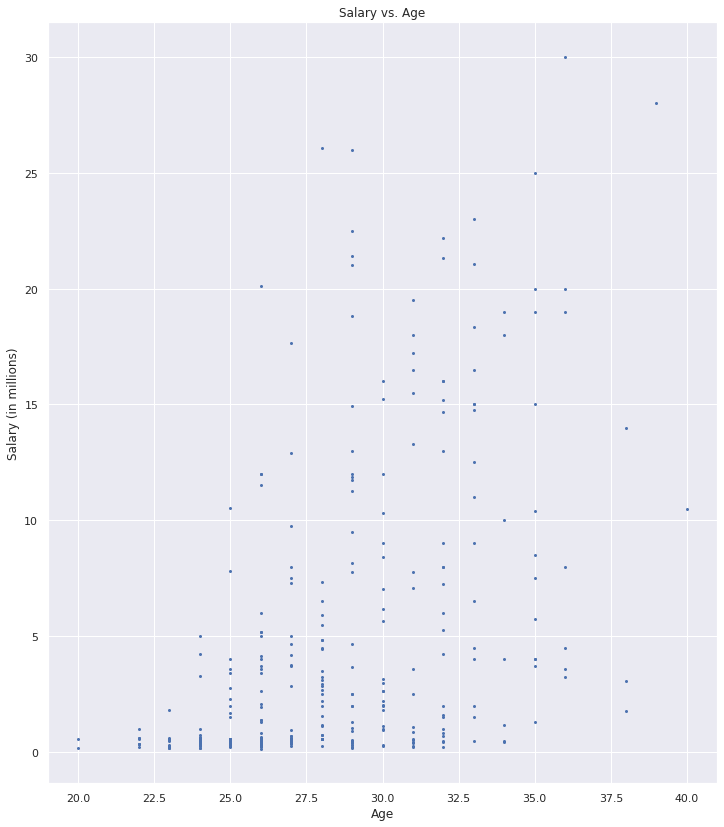

In [1124]:
import matplotlib.pyplot as plt
import numpy as np

x= stats['age']
y = stats['salary']
plt.scatter(x,y,s=4)
plt.xlabel('Age')
plt.ylabel('Salary (in millions)')
plt.title('Salary vs. Age')

Text(0.5, 1.0, 'Salary vs. Rookie contract')

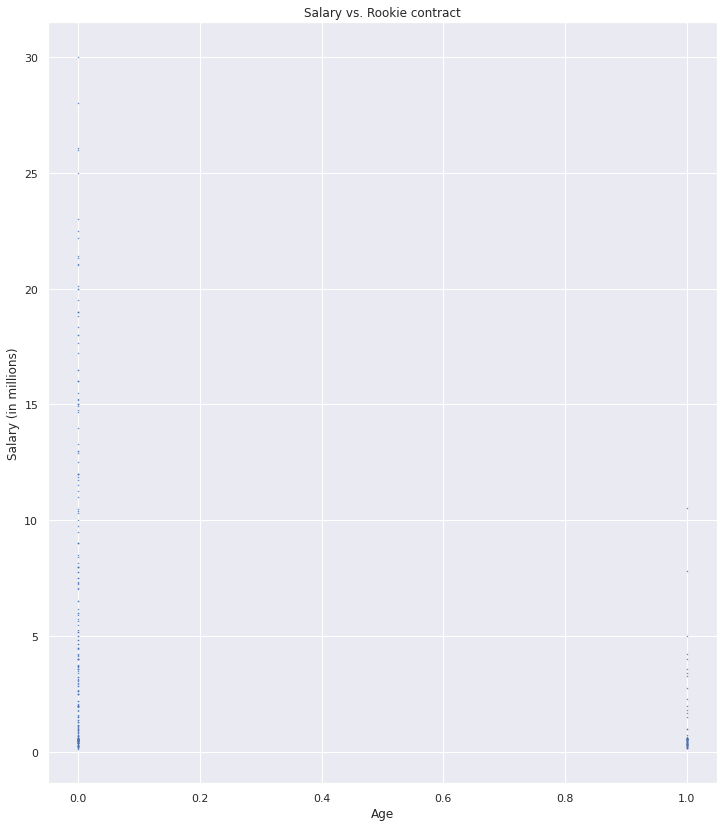

In [1125]:

x= stats['Rookie contract']
y = stats['salary']
plt.scatter(x,y,s=.2)
plt.xlabel('Age')
plt.ylabel('Salary (in millions)')
plt.title('Salary vs. Rookie contract')

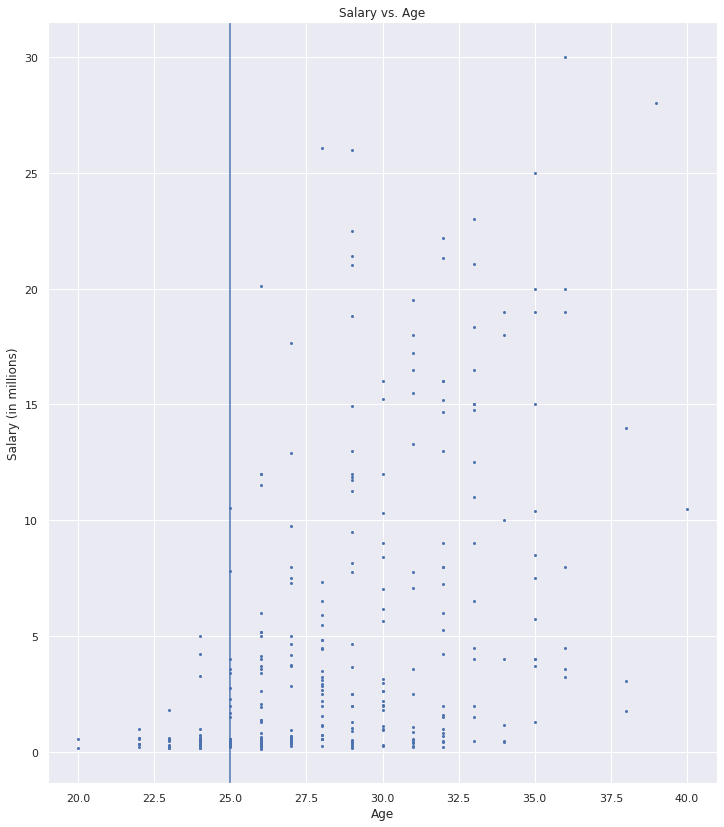

In [1126]:
#Plot of salary vs. age with line at dividing line for rookie contracts of age 25
x= stats['age']
y = stats['salary']
plt.scatter(x,y,s=4)
plt.xlabel('Age')
plt.ylabel('Salary (in millions)')
plt.title('Salary vs. Age')
plt.axvline(x=25)

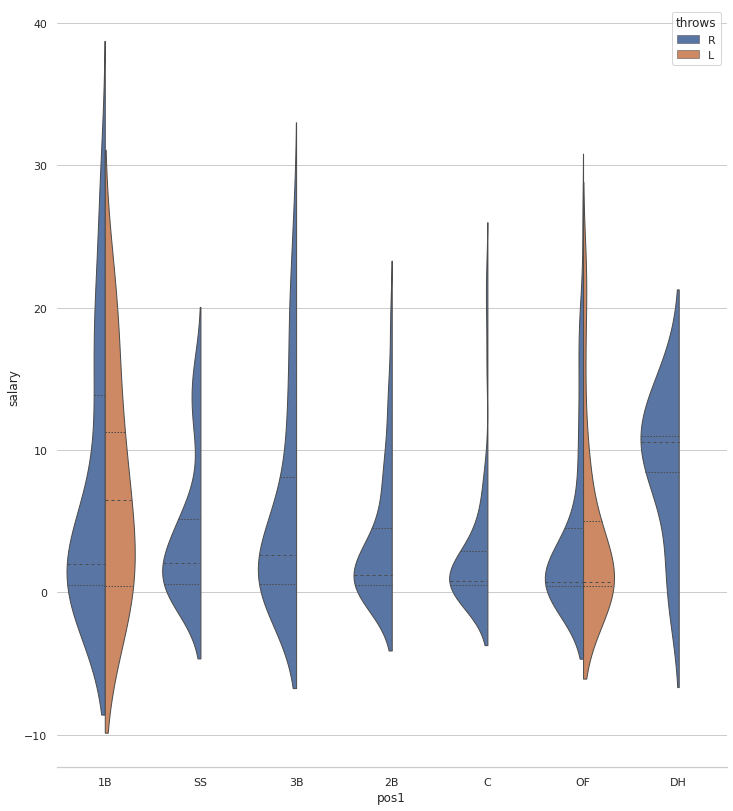

In [1127]:
#Use seaborn violin plot for a preliminary visualization of MLB salaries by position
import seaborn as sns
sns.set_theme(style= "whitegrid")
ax = sns.violinplot(x = stats['pos1'], y = stats['salary'], hue = stats['throws'],
                    split = True, inner = 'quart', linewidth = 1)
sns.set(rc = {'figure.figsize':(7,7)})
sns.despine(left = True)

Text(0, 0.5, 'Salary (millions)')

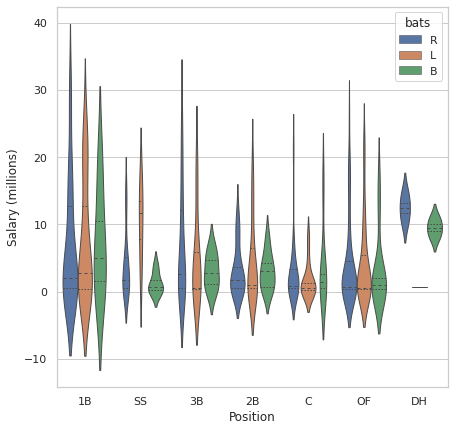

In [1128]:
sns.set_theme(style= "whitegrid")
ax = sns.violinplot(x = stats['pos1'], y = stats['salary'], hue = stats['bats'],
                     inner = 'quart', linewidth = 1)
sns.set(rc = {'figure.figsize':(12,14)})
ax.set_xlabel('Position')
ax.set_ylabel('Salary (millions)')

Text(0, 0.5, 'Salary (millions)')

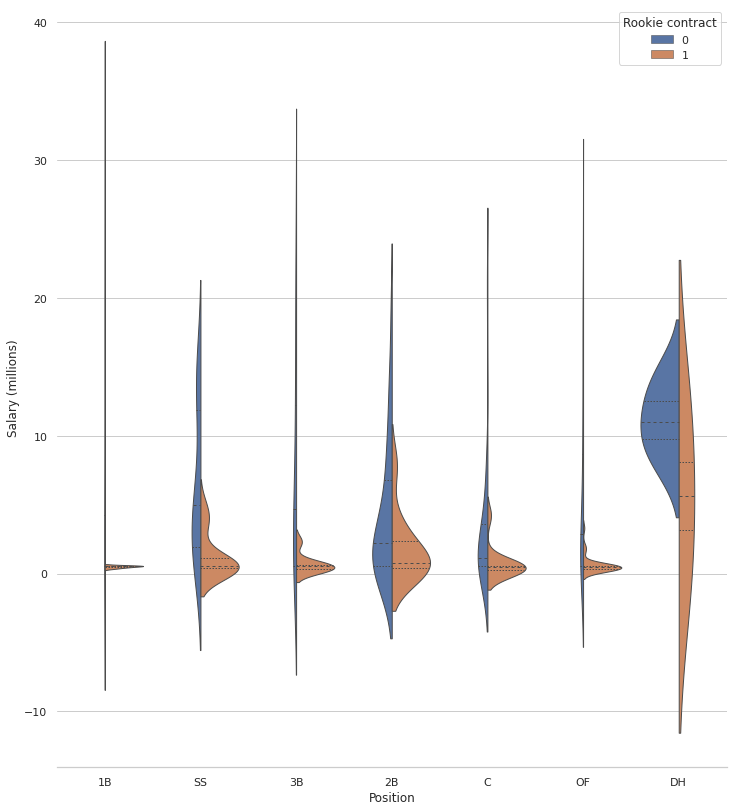

In [1129]:
sns.set_theme(style= "whitegrid")
ax = sns.violinplot(x = stats['pos1'], y = stats['salary'], hue = stats['Rookie contract'],
                    split = True, inner = 'quart', linewidth = 1)
sns.despine(left = True)
sns.set(rc = {'figure.figsize':(7,5)})

ax.set_xlabel('Position')
ax.set_ylabel('Salary (millions)')

In [1130]:
stats_numeric = stats.drop(['name', 'bats', 'throws', 'teamID','pos1'], axis = 1, inplace = False)

In [1131]:
#In the next two chunks we analyze correlations between the various features in the stats dataset.
#use pandas function corr() and the heatmap from seaborn.
#We want to see what features are highly correlated to the salary of a player

stats_numeric = stats_numeric.apply(pd.to_numeric)
stats_numeric.corr()

,age,G,tap,AB,R,H,db,tr,HR,RBI,...,obp,slg,woba,PRO,GURU,salary,ops,WAR,count,Rookie contract
age,1.000000,0.044449,0.007569,0.002295,-0.040306,-0.017855,-0.039396,-0.172340,-0.036857,0.007956,...,0.002679,-0.070010,-0.034138,-0.012506,-0.049797,0.512782,-0.049088,-0.118559,NaN,-0.667815
G,0.044449,1.000000,0.944852,0.943157,0.857623,0.892222,0.818759,0.470018,0.694507,0.818958,...,0.471322,0.513885,0.526350,0.895936,0.667956,0.326118,0.527348,0.541601,NaN,-0.066573
tap,0.007569,0.944852,1.000000,0.995843,0.940853,0.967641,0.891832,0.513066,0.783272,0.899415,...,0.525875,0.581953,0.591163,0.975858,0.774182,0.392747,0.594519,0.660431,NaN,-0.040980
AB,0.002295,0.943157,0.995843,1.000000,0.926402,0.974688,0.895808,0.525289,0.759407,0.887806,...,0.488991,0.568336,0.565161,0.962100,0.742718,0.381469,0.572247,0.631698,NaN,-0.033542
R,-0.040306,0.857623,0.940853,0.926402,1.000000,0.935498,0.894134,0.513053,0.847379,0.901218,...,0.615012,0.685894,0.693252,0.973376,0.882828,0.342476,0.699077,0.802833,NaN,-0.024449
H,-0.017855,0.892222,0.967641,0.974688,0.935498,1.000000,0.919354,0.548789,0.748224,0.885957,...,0.570540,0.631115,0.638531,0.966848,0.810121,0.373364,0.644825,0.705331,NaN,-0.016568
db,-0.039396,0.818759,0.891832,0.895808,0.894134,0.919354,1.000000,0.493387,0.697641,0.836838,...,0.534308,0.625554,0.618885,0.903416,0.775462,0.325341,0.628528,0.677649,NaN,0.013400
tr,-0.172340,0.470018,0.513066,0.525289,0.513053,0.548789,0.493387,1.000000,0.264359,0.377884,...,0.250989,0.273099,0.274410,0.499321,0.383537,0.015064,0.280428,0.391963,NaN,0.097336
HR,-0.036857,0.694507,0.783272,0.759407,0.847379,0.748224,0.697641,0.264359,1.000000,0.916937,...,0.527067,0.781257,0.708020,0.857140,0.873531,0.308309,0.737265,0.764084,NaN,-0.031701
RBI,0.007956,0.818958,0.899415,0.887806,0.901218,0.885957,0.836838,0.377884,0.916937,1.000000,...,0.554757,0.730836,0.690681,0.936338,0.864494,0.383937,0.710675,0.720075,NaN,-0.045157


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.subplots(figsize = (35,35))
sns.heatmap(stats_numeric.corr(), 
            vmin = -1,
            vmax = 1, 
            center = 0,
            cmap = sns.diverging_palette(20,220,n = 200),
            annot = True, annot_kws = {'size': 15},
            square = True
            )

In [ ]:
#Key Takeaways here:
#Salary is positively correlated with features such as age, tap, AB, RBI, BB, SF, GIDP, PRO
#whereas features such as avg, obp, and ops which represent percentages (between 0 and 1) are less positively correlated.
#Salary is negatively correlated with rookie contract.

In [ ]:
#Still need to account for non-numerical features that play an important role in 
#predicting a player's salary such as batter stance, throwing hand, and position

In [ ]:
#One-hot encode these important categorical variables

In [ ]:
positions = ['1B', '2B','SS','3B','C','OF', 'DH']
pos = pd.DataFrame(columns = ['positions'])
pos['positions'] = positions
pos.head(10)

In [ ]:
y = pd.get_dummies(pos.positions, prefix = 'pos')
y.head(10)

In [ ]:
dummy_position = pd.get_dummies(stats['pos1'], prefix = 'position')
dummy_throws = pd.get_dummies(stats['throws'], prefix = 'throws')
dummy_bats = pd.get_dummies(stats['bats'], prefix = 'bats')

In [ ]:
#Add the new one hot encoded portions to the original dataframe
dummies = [dummy_position, dummy_throws, dummy_bats]
#Add the one hot coded dataframes for position, throwing hand, and batting stance into the original stats dataframe
for item in dummies:
  stats = pd.merge(left = stats, right = item, left_index = True, right_index = True)
#Drop the old columns holding bats and throws since we have this info in one hot encoded format already in the dataframe
stats.drop(['bats','throws','pos1'], axis = 1, inplace = True)
stats.head()

In [ ]:
#Write the cleaned dataframe to a csv file so we can continue preprocessing 
#and model building in a new file.
stats.to_csv('2019_stats_clean.csv', index = False)